### Data Mining and Machine Learning
### Linear Discriminant Analysis (LDA)
#### Edgar Acuna
### March 2021

In [41]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

### Example 1. Predicting the final grade in a class based on the scores in  Ex1 and Ex2

In [42]:
# Ejemplo1. Leyendo los datos de las notas en un curso, usando como predictoras E1 y E2
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")
#df=pd.read_csv("c://PW-PR/eje1dis.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E1      32 non-null     int64 
 1   E2      32 non-null     int64 
 2   PF      32 non-null     int64 
 3   Nota    32 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [43]:
df.head()

,E1,E2,PF,Nota
0,96,100,100,p
1,96,94,99,p
2,100,91,97,p
3,93,96,97,p
4,90,94,95,p


Extracting the average scores in both exams for students with final grade P

In [44]:
pasan=df[df['Nota']=="p"][["E1",'E2']]
pasan.mean()

E1    75.541667
E2    73.750000
dtype: float64

Extracting the average scores in both exams for students with final grade F

In [45]:
fail=df[df['Nota']=="f"][["E1",'E2']]
fail.mean()

E1    59.5
E2    34.0
dtype: float64

Computing the covariance matrices for each group

In [46]:
pcov=pasan.cov()
fcov=fail.cov()
pcov

,E1,E2
E1,187.563406,34.228261
E2,34.228261,507.065217


In [47]:
fcov

,E1,E2
E1,183.428571,-97.285714
E2,-97.285714,106.285714


Computing the coeficients of the discriminant function

In [48]:
npa=len(pasan)
nf=len(fail)
pool_cov=((npa-1)*pcov+(nf-1)*fcov)/(npa+nf-2.0)
pool_cov
mean_vec=pasan.mean()-fail.mean()
np.array(mean_vec).dot(np.linalg.inv(np.array(pool_cov)))

array([0.08415817, 0.09539823])

Computing the independent term of the discriminant function

In [49]:
mean_vec1=pasan.mean()+fail.mean()
0.5*np.array(mean_vec).dot(np.linalg.inv(np.array(pool_cov))).dot(np.array(mean_vec1))

10.82200974791381

### This is the discriminant equation $.084E1+.095E2=10.822$

In [50]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]

In [51]:
#Haciendo el analisis discriminante y calculando el porcentaje de precision
ldadis = LinearDiscriminantAnalysis(priors=(.5,.5)).fit(X,y)
#Tasa de precision
ldadis.score(X, y)

0.875

In [52]:
#Calculating the posterior probabilities
pred1=ldadis.predict_proba(X)
pred1

array([[0.00111588, 0.99888412],
       [0.00197619, 0.99802381],
       [0.00187917, 0.99812083],
       [0.00210165, 0.99789835],
       [0.0032701 , 0.9967299 ],
       [0.03204928, 0.96795072],
       [0.00714424, 0.99285576],
       [0.03118462, 0.96881538],
       [0.12842348, 0.87157652],
       [0.05009503, 0.94990497],
       [0.04383433, 0.95616567],
       [0.20239494, 0.79760506],
       [0.39989907, 0.60010093],
       [0.02692351, 0.97307649],
       [0.01969734, 0.98030266],
       [0.82693254, 0.17306746],
       [0.2015579 , 0.7984421 ],
       [0.23504734, 0.76495266],
       [0.78306353, 0.21693647],
       [0.30434826, 0.69565174],
       [0.70198569, 0.29801431],
       [0.59923064, 0.40076936],
       [0.44650439, 0.55349561],
       [0.11462215, 0.88537785],
       [0.86476333, 0.13523667],
       [0.97805078, 0.02194922],
       [0.81197294, 0.18802706],
       [0.90208326, 0.09791674],
       [0.87858201, 0.12141799],
       [0.97193157, 0.02806843],
       [0.

In [53]:
#Calculando the class predicted
pred=ldadis.predict(X)
pred

array(['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p',
       'p', 'p', 'f', 'p', 'p', 'f', 'p', 'f', 'f', 'p', 'p', 'f', 'f',
       'f', 'f', 'f', 'f', 'f', 'f'], dtype='<U1')

In [54]:
#Calcuting the number of errors
error=(y!=pred).sum()
print("Este es el numero de errores=", error)

Este es el numero de errores= 4


In [55]:
#Calculating the confusion matrix
confusion_matrix(y,pred)

array([[ 8,  0],
       [ 4, 20]], dtype=int64)

In [56]:
#Esta es una mejor presentacion
pd.crosstab(y,pred)

col_0,f,p
Nota,,
f,8,0
p,4,20


In [57]:
error_rate=error*100/len(df)
print("la tasa de error es", error_rate)

la tasa de error es 12.5


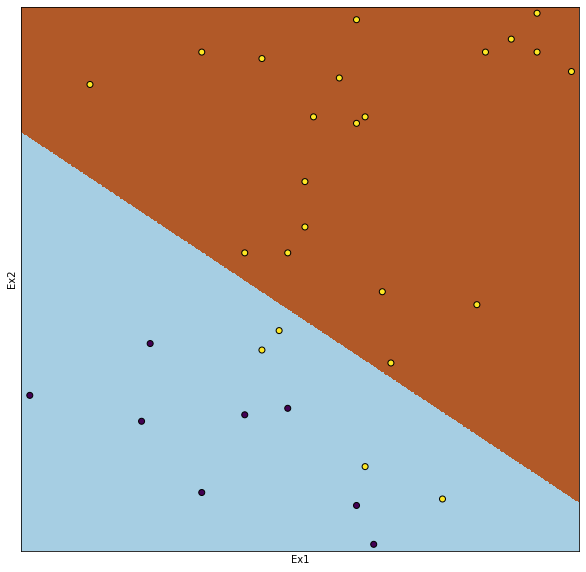

In [58]:
from matplotlib.colors import ListedColormap
ldadis = LinearDiscriminantAnalysis(priors=(.5,.5))
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
X1=X.values
y1=y2.values
ldadis.fit(X1,y1)
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=ldadis.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

The above does not take into account the classes size. Notice that the linear boundary can be moved down in  parallel way to improve the classification. The Bayesian version that is shown below uses priors proportional to the classes size. This prior is used by default

In [59]:
#Haciendo el analisis discriminante y calculando el porcentaje de precision
ldadis = LinearDiscriminantAnalysis().fit(X,y)
#Tasa de precision
ldadis.score(X, y)

0.9375

In [60]:
#Calculando the class predicted
pred=ldadis.predict(X)
pred

array(['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p',
       'p', 'p', 'f', 'p', 'p', 'f', 'p', 'p', 'p', 'p', 'p', 'f', 'f',
       'f', 'f', 'f', 'f', 'f', 'f'], dtype='<U1')

In [61]:
#Calcuting the number of errors
error=(y!=pred).sum()
print("Este es el numero de errores=", error)

Este es el numero de errores= 2


In [62]:
#This is a better presentation
pd.crosstab(y,pred)

col_0,f,p
Nota,,
f,8,0
p,2,22


In [63]:
error_rate=error*100/len(df)
print("la tasa de error es", error_rate)

la tasa de error es 6.25


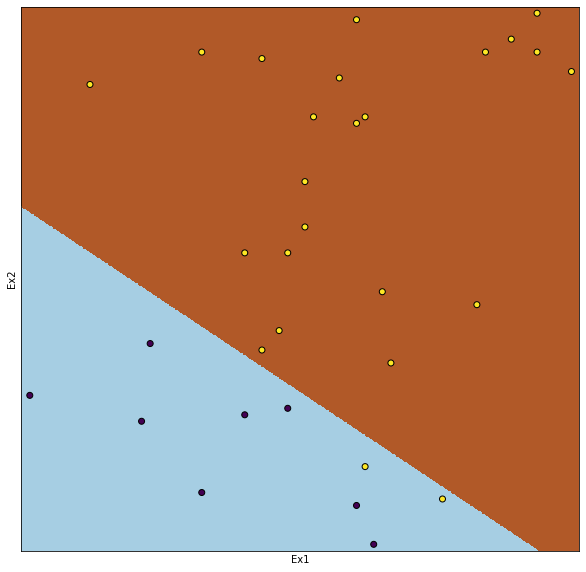

In [64]:
from matplotlib.colors import ListedColormap
ldadis = LinearDiscriminantAnalysis()
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
X1=X.values
y1=y2.values
ldadis.fit(X1,y1)
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=ldadis.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Example 2. LDA for the diabetes dataset

In [65]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
#url="c://PW-PR/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


In [66]:
#url= "http://academic.uprm.edu/eacuna/diabetes.dat"
url="http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
data.head()
y=data['class']
X=data.iloc[:,0:8]
#Haciendo el analisis discriminante y calculando el porcentaje de precision
ldadis = LinearDiscriminantAnalysis().fit(X,y)
#Tasa de precision
ldadis.score(X, y)

0.7838541666666666

In [67]:
#Calculando las predicciones
pred=ldadis.predict(X)
confusion_matrix(y,pred)

array([[446,  54],
       [112, 156]], dtype=int64)

In [68]:
#Estimacion de la precision using cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ldadis, X, y, cv=10)
scores

array([0.74025974, 0.75324675, 0.80519481, 0.72727273, 0.72727273,
       0.77922078, 0.80519481, 0.80519481, 0.76315789, 0.82894737])

In [69]:
print("Accuracy using LDA: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy using LDA: 0.77 (+/- 0.07)


### Example 3 : LDA for the vehicle dataset

In [70]:
#Ejemplo2. Leyendo los datos de vehiculos que tienen 4 clases y 18 predictoras
df1=pd.read_csv("http://academic.uprm.edu/eacuna/vehicle.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   COMPACTNESS                846 non-null    int64 
 1   CIRCULARITY                846 non-null    int64 
 2   DISTANCE_CIRCULARITY       846 non-null    int64 
 3   RADIUS_RATIO               846 non-null    int64 
 4   PR.AXIS_ASPECT_RATIO       846 non-null    int64 
 5   MAX.LENGTH_ASPECT_RATIO    846 non-null    int64 
 6   SCATTER_RATIO              846 non-null    int64 
 7   ELONGATEDNESS              846 non-null    int64 
 8   PR.AXIS_RECTANGULARITY     846 non-null    int64 
 9   MAX.LENGTH_RECTANGULARITY  846 non-null    int64 
 10  SCALED_VARIANCE_MAJOR      846 non-null    int64 
 11  SCALED_VARIANCE_MINOR      846 non-null    int64 
 12  SCALED_RADIUS_OF_GYRATION  846 non-null    int64 
 13  SKEWNESS_ABOUT_MAJOR       846 non-null    int64 
 14  SKEWNESS_A

In [71]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df1['Class']
X=df1.iloc[:,0:18]
y1=y.values
X1=X.values

In [72]:
#Haciendo el analisis discriminante y calculando el porcentaje de precision
ldadis = LinearDiscriminantAnalysis().fit(X1,y1)
#Tasa de precision
ldadis.score(X1, y1)

0.7978723404255319

In [73]:
#Calculando las probabilidades posteriores
prob_post=ldadis.predict_proba(X1)
prob_post

array([[8.51249963e-02, 5.23749475e-03, 1.14048231e-02, 8.98232686e-01],
       [2.33473663e-05, 1.31912960e-03, 4.62113191e-03, 9.94036391e-01],
       [1.19674801e-04, 1.25539318e-01, 8.73706916e-01, 6.34090720e-04],
       ...,
       [5.80974169e-07, 3.91997095e-01, 6.07820927e-01, 1.81396490e-04],
       [5.84144732e-04, 3.18879603e-01, 5.92545939e-01, 8.79903134e-02],
       [7.24679492e-06, 7.70983987e-04, 4.83671526e-04, 9.98738098e-01]])

In [74]:
#Calculando las predicciones
pred=ldadis.predict(X1)
pred

array(['van', 'van', 'saab', 'van', 'bus', 'bus', 'bus', 'van', 'van',
       'opel', 'van', 'saab', 'bus', 'van', 'bus', 'opel', 'van', 'bus',
       'saab', 'opel', 'bus', 'opel', 'bus', 'van', 'opel', 'van', 'saab',
       'saab', 'bus', 'opel', 'van', 'van', 'saab', 'saab', 'opel', 'van',
       'bus', 'van', 'saab', 'bus', 'opel', 'van', 'van', 'saab', 'saab',
       'van', 'van', 'bus', 'van', 'opel', 'opel', 'opel', 'saab', 'bus',
       'bus', 'van', 'saab', 'van', 'saab', 'van', 'opel', 'opel', 'van',
       'bus', 'bus', 'saab', 'bus', 'opel', 'van', 'bus', 'bus', 'opel',
       'saab', 'opel', 'van', 'opel', 'saab', 'bus', 'bus', 'bus', 'bus',
       'bus', 'van', 'opel', 'bus', 'bus', 'van', 'van', 'bus', 'opel',
       'saab', 'saab', 'saab', 'van', 'bus', 'opel', 'saab', 'bus',
       'saab', 'bus', 'bus', 'van', 'van', 'van', 'bus', 'saab', 'opel',
       'opel', 'bus', 'bus', 'van', 'van', 'opel', 'saab', 'van', 'van',
       'saab', 'saab', 'bus', 'bus', 'bus', 'van', 

In [75]:
confusion_matrix(y1,pred)

array([[211,   4,   0,   3],
       [  7, 133,  66,   6],
       [ 11,  57, 139,  10],
       [  2,   3,   2, 192]], dtype=int64)

In [76]:
#Esta es una mejor presentacion
pd.crosstab(y,pred)

col_0,bus,opel,saab,van
Class,,,,
bus,211,4,0,3
opel,7,133,66,6
saab,11,57,139,10
van,2,3,2,192
